-3.933693293906993 14.751293101500265 0.19569471624266144
97.0


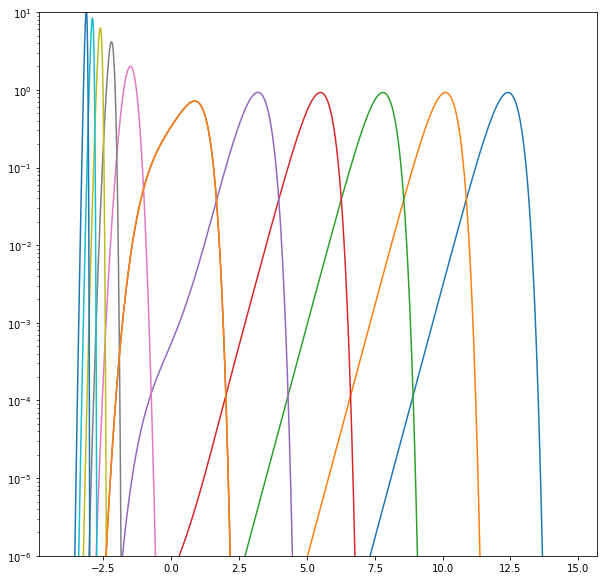

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def alpha_beta_rm1(t):
    c = np.cosh(t)
    s = np.sinh(t)
    e = np.exp(-s)
    alpha = (4 / np.sqrt(np.pi)) * c / (1+e)
    beta = 4*(np.log(1+e)+s)**2
    return alpha,beta

def alpha_beta_rm3(t):
    c = np.cosh(t)
    s = np.sinh(t)
    e = np.exp(-s)
    alpha = (4 / np.sqrt(np.pi)) * c / (1+e)
    beta = (np.log(1+e)+s)**2
    return alpha * beta, beta

def integrand(r,t):
    alpha, beta = alpha_beta_rm3(t)
    return alpha * np.exp(-beta * r**2)

def calc_min_max_rm1(r_min, prec):
    t1 = 1.0
    t2 = 1.0
    while ((2 * t1 * np.exp(-t1)) > prec): t1 *= 1.1
    while ((np.sqrt(t2) * np.exp(-t2) / r_min) > prec): t2 *= 1.1
    t_min = - np.log(2 * t1)
    t_max =   np.log(t2 / (r_min * r_min))/2
    return t_min, t_max
    
def calc_min_max_rm3(r_min, prec):
    t1 = 1.0
    t2 = 1.0
    while ((2 * t1 * np.exp(-t1)) > prec): t1 *= 1.1
    while ((np.sqrt(t2) * np.exp(-t2) / r_min) > prec): t2 *= 1.1
    t_min = - np.log(2 * t1)
    t_max =   np.log(t2 / (r_min * r_min))/1.8
    return t_min, t_max
    
prec = 1e-9
r_min = 1e-5
r_max = 1
t_min,t_max = calc_min_max_rm3(r_min/r_max, prec)
x_array = np.arange(t_min, t_max, 0.002)
y_min_array = integrand(r_min,           x_array)*(r_min)**3
y_1_array = integrand(r_min*10,          x_array)*(r_min*10)**3
y_2_array = integrand(r_min*100,         x_array)*(r_min*100)**3
y_3_array = integrand(r_min*1000,        x_array)*(r_min*1000)**3
y_4_array = integrand(r_min*10000,       x_array)*(r_min*10000)**3
y_5_array = integrand(r_min*100000,      x_array)*(r_min*100000)**3
y_6_array = integrand(r_min*1000000,     x_array)*(r_min*1000000)**3
y_7_array = integrand(r_min*10000000,    x_array)*(r_min*10000000)**3
y_8_array = integrand(r_min*100000000,   x_array)*(r_min*100000000)**3
y_9_array = integrand(r_min*1000000000,  x_array)*(r_min*1000000000)**3
y_A_array = integrand(r_min*10000000000, x_array)*(r_min*10000000000)**3
y_max_array = integrand(r_max, x_array)*r_max**3
plt.figure(figsize=(10,10))
plt.yscale("log")
plt.ylim((r_min/10,10))
plt.plot(x_array, y_min_array)
plt.plot(x_array, y_1_array)
plt.plot(x_array, y_2_array)
plt.plot(x_array, y_3_array)
plt.plot(x_array, y_4_array)
plt.plot(x_array, y_5_array)
plt.plot(x_array, y_6_array)
plt.plot(x_array, y_7_array)
plt.plot(x_array, y_8_array)
plt.plot(x_array, y_9_array)
plt.plot(x_array, y_A_array)
plt.plot(x_array, y_max_array)
h = 1 / (0.7 -  0.49 * np.log10(prec))
n_exp = np.ceil((t_max - t_min) / h) + 1
print(t_min, t_max, h)
print(n_exp)

97


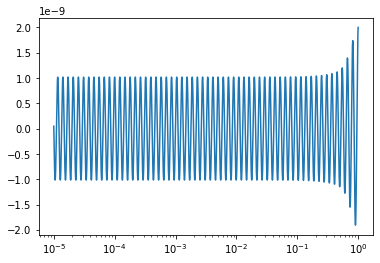

In [25]:
def fill_separated_expansion(r_min,r_max,prec):
    r_0 = r_min / r_max
    t_min, t_max = calc_min_max_rm3(r_0, prec)
    h = 1 / (0.7 -  0.49 * np.log10(prec))
    n_exp = np.int(np.ceil((t_max - t_min) / h) + 1)
    ab = np.zeros(shape=(2,n_exp))
    for i in range(n_exp):
        t = t_min + h * i
        ab[0][i], ab[1][i] = alpha_beta_rm3(t)
    ab[0] *= h / r_max**3
    ab[1] /= r_max**2
    ab[0][0] /= 2
    ab[0][n_exp-1] /= 2
    print(n_exp)
    return ab

def separated_func(r,ab):
    val = 0
    for i in range(len(ab[0])):
        alpha = ab[0][i]
        beta = ab[1][i]
        val += r**2 * alpha * np.exp(-beta * r**2)
    return val
        
ab = fill_separated_expansion(r_min,r_max,prec)

log_x_array = np.arange(np.log(r_min),np.log(r_max),(np.log(r_max)-np.log(r_min))/400000)
x_array = np.exp(log_x_array)
sep_array = separated_func(x_array, ab)
rm3_array = 1/x_array**2
dif_array = 1 - separated_func(x_array, ab) * (x_array)
plt.xscale("log")
#print(log_x_array)
plt.plot(x_array,dif_array)
#plt.plot(x_array,sep_array)
#plt.plot(x_array,rm3_array)

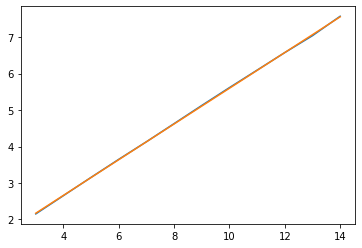

In [29]:
#
# Fitting of the step parameter to obtain the required precision
#
prec = [3.,     4.,    5.,    6.,    7.,    8.,    9.,   10.,   11.,   12.,   13.,   14.]
h_emp = [1/0.465, 1/0.377, 1/0.317, 1/0.274, 1/0.242, 1/0.216, 1/0.195, 1/0.178, 1/0.164, 1/0.152, 1/0.142, 1/0.132]

def h_func(a,b,p):
    val = (a +  b * p)
    return val
h_fit = []

a=0.7
b=0.49
for i in range(len(prec)):
    h_fit.append(h_func(a,b,prec[i]))

plt.plot(prec, h_emp)
plt.plot(prec, h_fit)